In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("spotify.csv")

In [5]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [7]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [9]:
df['Popularity'].unique()

array([92, 91, 90, 88, 87, 86, 85, 84, 83, 68, 63, 77, 81, 73, 71, 79, 93,
       89, 97, 78, 80, 66, 72, 82, 75, 69, 65, 74, 96, 76, 67, 70, 60, 56,
       61, 58, 59, 51, 29, 55, 54, 64, 47, 35, 62, 53, 52, 48, 57, 44, 49],
      dtype=int64)

In [11]:
df['Duration (ms)'].unique()

array([319191, 173986, 260111, 247444, 218364, 198973, 298940, 246133,
       291175, 239359, 157560, 215280, 213817, 184013, 218146, 220293,
       192840, 149546, 231266, 172137, 226613, 180869, 210626, 109750,
       200013, 199386, 170977, 201920, 166299, 191700, 211582, 251249,
       243836, 220584, 194786, 239613, 312820, 353754, 138411, 201812,
       212352, 173947, 156578, 139741, 227478, 242453, 113292, 125302,
       199920, 182666, 265996, 189893, 313546, 204600, 238253, 172933,
       237918, 255053, 231746, 357706, 299333, 243490, 221813, 228093,
       286906, 236883, 248586, 270697, 221520, 143718, 193591, 198292,
       195046, 207585, 290320, 250760, 284200, 326466, 210800, 263373,
       297786, 350320, 404106, 250188, 232186, 386906, 177000, 213400,
       275253, 252262, 247800, 211420, 219333, 185946, 276920, 205733,
       267520, 201453, 272506, 178213, 140746, 284493, 283066, 187541,
       253390, 175099, 200889, 217288, 204466, 156944, 136400, 223712,
      

# 1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [14]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [16]:
df.duplicated().sum()

27

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

# 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

In [23]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

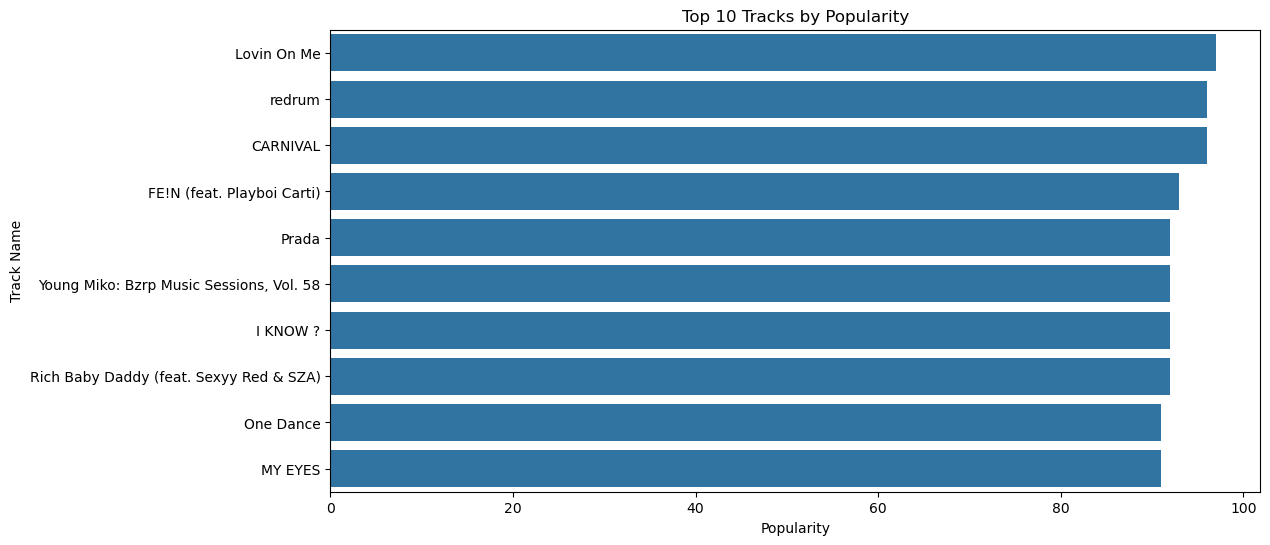

In [25]:
# Top 10 most popular tracks
top_tracks = df.sort_values(by='Popularity', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_tracks, x='Popularity', y='Track Name')

plt.title("Top 10 Tracks by Popularity")
plt.show()


# 3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [28]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

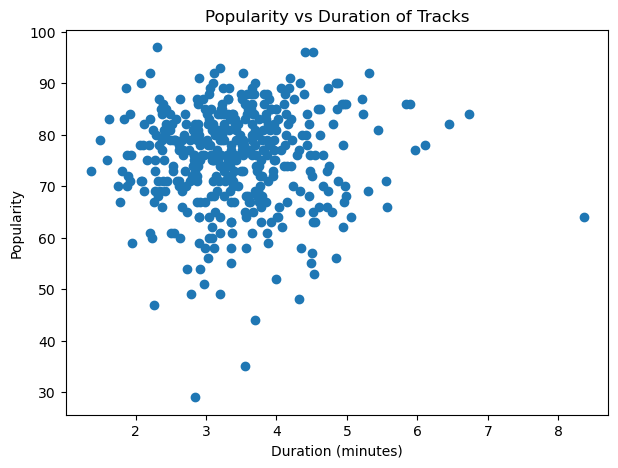

In [34]:
# convert duration to minutes (agar ms me hai)
df['Duration_min'] = df['Duration (ms)'] / 60000

# scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['Duration_min'], df['Popularity'])

plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration of Tracks")

plt.show()


# 4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

In [38]:
top_artists = df['Artist'].value_counts().head(10)
top_artists


Artist
Drake           17
Eminem          11
Flo Rida        10
Ludacris        10
Timbaland       10
¥$              10
21 Savage       10
JAY-Z           10
Lil Nas X       10
Travis Scott     9
Name: count, dtype: int64

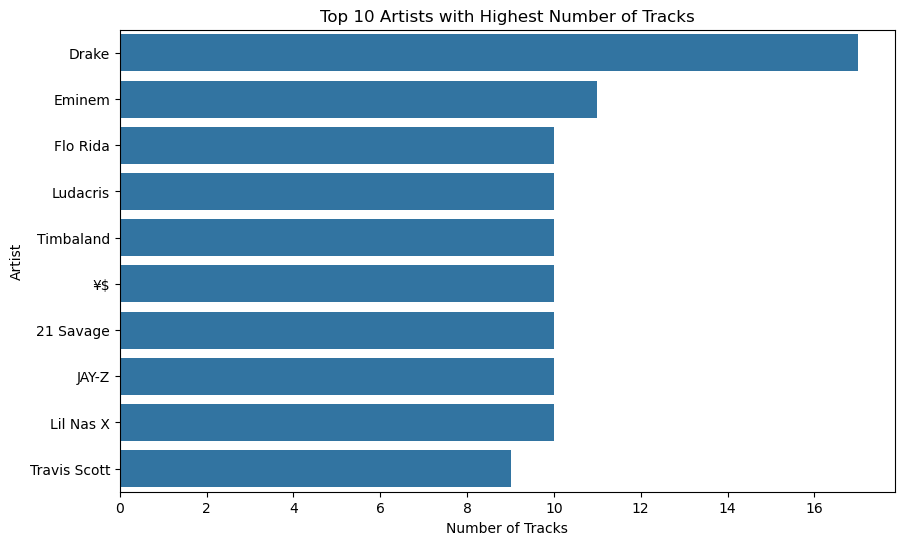

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index)

plt.title("Top 10 Artists with Highest Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")

plt.show()

# 5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [44]:
# Top 5 least popular tracks
least_popular = df.sort_values(by='Popularity', ascending=True)

least_popular[['Artist','Track Name','Popularity']].head(5)


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


# 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [47]:
# Top 5 artists (based on number of tracks)
top5_artists = df['Artist'].value_counts().head(5).index

# Filter dataset for top 5 artists
top5_df = df[df['Artist'].isin(top5_artists)]

# Calculate average popularity of each artist
avg_popularity = (
    top5_df.groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

print(avg_popularity)


Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


# 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [50]:
# Top 5 artists based on number of tracks
top5_artists = df['Artist'].value_counts().head(5).index

# Filter dataset for these artists
top5_df = df[df['Artist'].isin(top5_artists)]

# For each artist → get their most popular track
most_popular_tracks = (
    top5_df.sort_values('Popularity', ascending=False)
           .groupby('Artist')
           .first()[['Track Name','Popularity']]
           .sort_values('Popularity', ascending=False)
)

print(most_popular_tracks)


                                        Track Name  Popularity
Artist                                                        
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
Timbaland                            The Way I Are          85
Flo Rida                        Low (feat. T-Pain)          84
Ludacris                              My Chick Bad          67


# 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

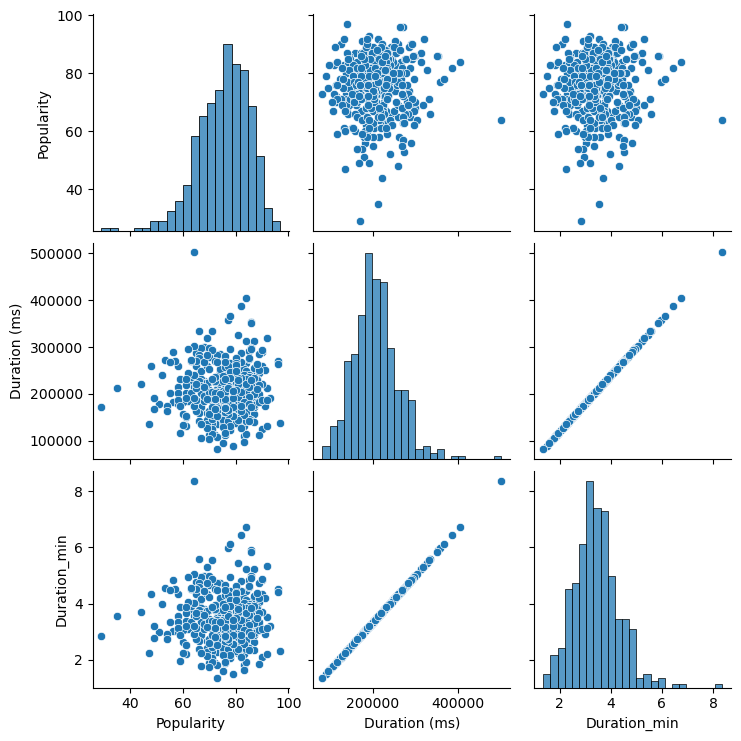

In [55]:

# Select only numerical columns
num_cols = df.select_dtypes(include='number')

# Pair Plot
sns.pairplot(num_cols)

plt.show()


# 9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot


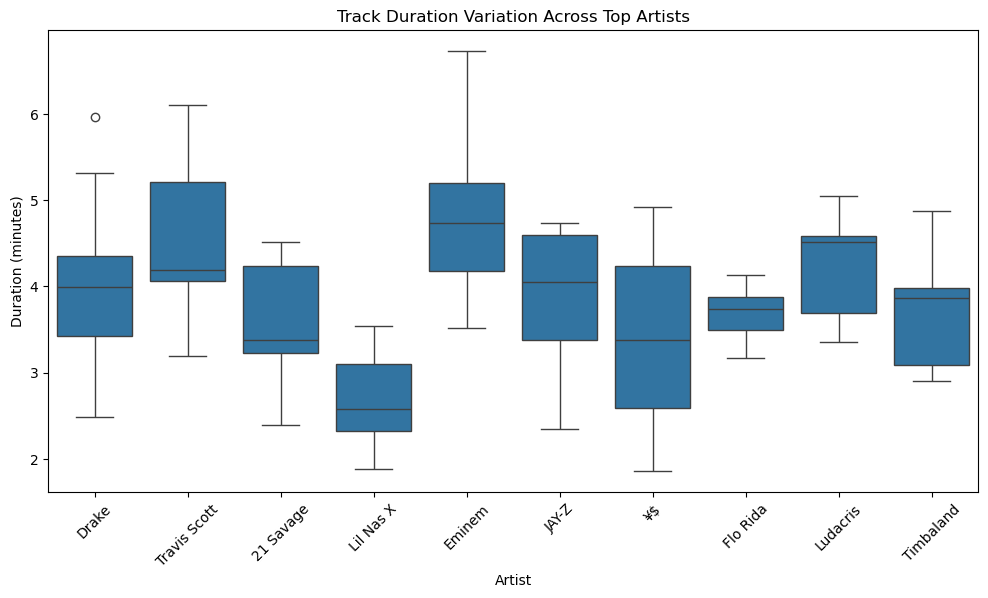

In [58]:
# Duration ko minutes me convert (agar ms me hai)
df['Duration_min'] = df['Duration (ms)'] / 60000

# Top 10 artists select (clean graph ke liye)
top_artists = df['Artist'].value_counts().head(10).index
top_df = df[df['Artist'].isin(top_artists)]

# Box Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=top_df, x='Artist', y='Duration_min')

plt.xticks(rotation=45)
plt.title("Track Duration Variation Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (minutes)")

plt.show()

# 10 .How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

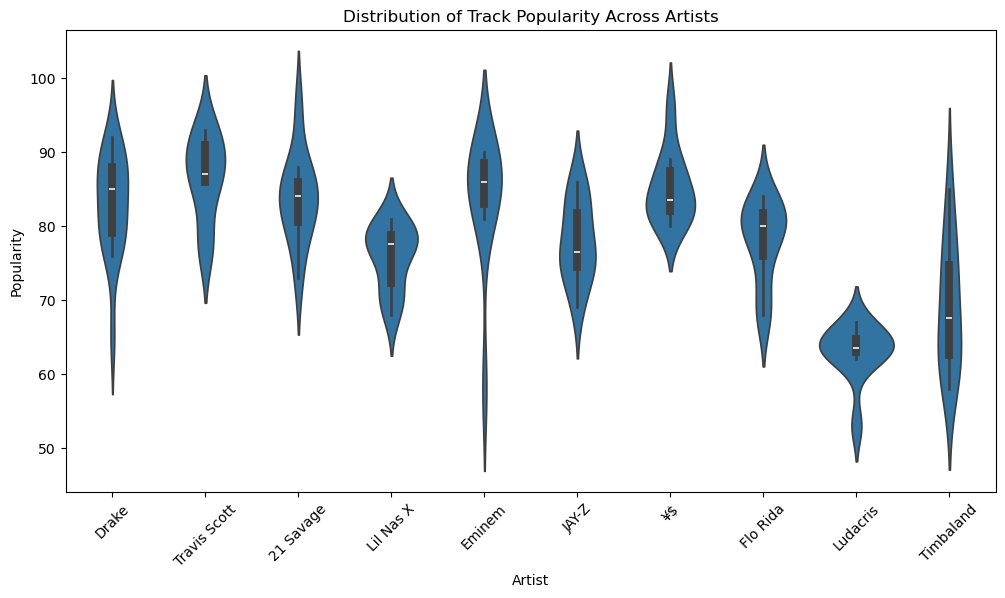

In [61]:
top_artists = df['Artist'].value_counts().head(10).index
top_df = df[df['Artist'].isin(top_artists)]

# Violin Plot (recommended)
plt.figure(figsize=(12,6))
sns.violinplot(data=top_df, x='Artist', y='Popularity')

plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")

plt.show()